In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from performance_calculation import *

In [2]:
# Small function to convert the strings to arrays.
def conv2arr(array):
    if not isinstance(array, str) or array == '.':
        return None
    
    string_arr = array.split(', ')
    if string_arr[-1][-1] == ',':
        string_arr[-1] = string_arr[-1][0]
    
    # Convert each string to an int where possible.
    # Replace 'x' with -2.
    numbers = np.array([])
    for numeric_string in string_arr:
        if 'x' in numeric_string:
            numbers = np.append(numbers, -2)
        else:
            numbers = np.append(numbers, int(numeric_string))
            
    # Stupid but correct formatting.
    return np.array([numbers])

In [3]:
experiments = pd.read_csv('experiments.csv')

# Since we have some bad trials, filter them out.
experiments = experiments[experiments['corrected?']=='Y']
experiments

,trial id,trial name,EMG,Speaker reference list,Speaker feedback,Num characters,Time delay (ms),Output,time (s),errors,...,reference_shortened,encoding input,encoding corrected,decoding output,decoding corrected,corrected?,raw encoding input,raw decoding output,Comments,Unnamed: 23
0,1,e1,1,0,0,50,1500,Sight,120,1,...,NaN,"2, 2, 8, 9, 9, 8, -1, 5, -1, 9, 6, 9, 4, 2, 0,...","2, 2, 8, 9, 9, x, 9, 6, 9, 4, 2, 0, 5, 3, 6, 0...",NaN,NaN,Y,"2, 2, 8, 9, 9, 8, -1, 5, -1, 9, 6, 9, 4, 2, 0,...",NaN,NaN,NaN
1,2,e2,1,0,0,50,1500,Sight,113,2,...,NaN,"8, 8, 3, 1, 8, -2, 9, 4, 6, 6, 0, 9, 8, 3, 4, ...","8, 8, 3, 1, 8, x, 9, 4, 6, 6, 0, 9, 8, 3, 4, 2...",NaN,NaN,Y,NaN,NaN,NaN,NaN
2,3,e3,0,1,0,50,1500,Sight,71,7,...,NaN,"0, 4, 5, 9, 9, 6, 2, 1, 8, 3, 3, 3, 2, 5, 0, 0...","0, 4, 5, 9, 9, 6, 2, 1, 8, 3, 3, 3, 2, 5, 0, 0...",NaN,NaN,Y,"0, 4, 5, 9, 9, 6, 2, 1, 8, 3, 3, 3, 2, 5, 0, 0...",NaN,NaN,NaN
3,4,e4,0,0,0,50,1500,Sight,60,10,...,NaN,"9, 0, 9, 0, 2, 2, 6, 6, 7, 1, 3, 3, 6, 5, 5, 5...","9, 0, 9, 0, 2, 2, 6, 6, 7, 1, 3, 3, 6, 5, 5, 5...",NaN,NaN,Y,NaN,NaN,NaN,NaN
4,5,e11,1,1,0,50,1500,Sight,112,2,...,NaN,"4, 3, 3, -2, 8, -2, -2, 2, 1, 7, 1, 3, 0, 8, 0...","4, 3, 3, x, 8, x, x, 2, 1, 7, 1, 3, 0, 8, 0, 0...",NaN,NaN,Y,"4, 3, 3, 6, -1, 8, 9, -1, 2, 1, 7, 1, 3, 0, 8,...",NaN,NaN,NaN
5,6,e12,1,1,0,50,1500,Sight,79,0,...,NaN,"4, 8, 1, 5, 2, 0, 1, 1, 8, 7, 3, 4, 2, 2, 1, 7...","4, 8, 1, 5, 2, 0, 1, 1, 8, 7, 3, 4, 2, 2, 1, 7...",NaN,NaN,Y,"4, 8, 1, 5, 1, -1, 2, 0, 1, 6, -1, 1, 8, 7, 3,...",NaN,NaN,NaN
6,7,e15,1,0,1,50,1500,Sight,130,6,...,NaN,"9, 6, 0, 9, 7, 5, 1, 9, 7, 6, 5, -2, 0, 3, 4, ...","9, 6, 0, 9, 7, 5, 1, 9, 7, 6, 5, x, 0, 3, 4, 3...",NaN,NaN,Y,"9, 6, 0, 6, -1, 9, 7, 5, 1, 9, 7, 8, -1, 8, -1...",NaN,NaN,NaN
7,8,e13,1,1,0,50,1500,Sight,104,3,...,NaN,"0, 4, 4, 3, 5, 5, 8, 4, 8, 9, 8, 6, 2, 6, 4, 9...","0, 4, 4, 3, 5, 5, 8, 4, 8, 9, 8, 6, 2, 6, 4, 9...",NaN,NaN,Y,"0, 4, 4, 3, 8, -1, 8, -1, 6, -1, 5, 5, 8, 4, 8...",NaN,NaN,NaN
8,9,e14,1,0,1,50,1500,Sight,102,0,...,NaN,"4, 6, 0, 9, 3, 9, 7, 2, 5, 5, 1, 2, 6, 7, 4, 3...","4, 6, 0, 9, 3, 9, 7, 2, 5, 5, 1, 2, 6, 7, 4, 3...",NaN,NaN,Y,"4, 6, 0, 9, 3, 9, 7, 2, 5, 5, 1, 4, -1, -1, 2,...",NaN,NaN,NaN
9,10,e8,1,0,1,50,1500,Sight,106,4,...,NaN,"3, 8, 8, 3, 3, 4, 7, -2, -2, 4, 1, 1, 4, 3, 2,...","3, 8, 8, 3, 3, 4, 7, x, x, 4, 1, 1, 4, 3, 2, 2...",NaN,NaN,Y,"5, -1, 3, 8, 8, 3, 3, 6, -1, -1, -1, 4, 2, -1,...",NaN,NaN,NaN


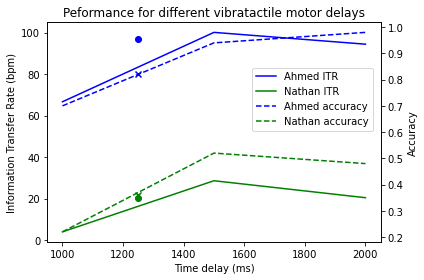

In [4]:
# Plot the difference in ITR and accuracy for different time delays.

# Get all t trials
t_trials = experiments[experiments['trial name'].str.contains('t')]

t_trials_a = t_trials[t_trials['subject'] == 'Ahmed']
a_decoding_itr = t_trials_a.apply(lambda x: calc_itr(conv2arr(x['encoding corrected']), conv2arr(x['decoding corrected']), x['time (s)']), axis=1)
a_decoding_accuracy = t_trials_a.apply(lambda x: calc_accuracy(conv2arr(x['encoding corrected']), conv2arr(x['decoding corrected'])), axis=1)

t_trials_n = t_trials[t_trials['subject'] == 'Nathan']
n_decoding_itr = t_trials_n.apply(lambda x: calc_itr(conv2arr(x['encoding corrected']), conv2arr(x['decoding corrected']), x['time (s)']), axis=1)
n_decoding_accuracy = t_trials_n.apply(lambda x: calc_accuracy(conv2arr(x['encoding corrected']), conv2arr(x['decoding corrected'])), axis=1)

# Add the trials to the figure.
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time delay (ms)')
ax1.set_ylabel('Information Transfer Rate (bpm)')
lns1 = ax1.plot(t_trials_a['Time delay (ms)'][:-1], a_decoding_itr[:-1], color='blue', label='Ahmed ITR')
lns2 = ax1.plot(t_trials_n['Time delay (ms)'][:-1], n_decoding_itr[:-1], color='green', label='Nathan ITR')
ax1.scatter(t_trials_a['Time delay (ms)'].iloc[-1], a_decoding_itr.iloc[-1], color='blue')
ax1.scatter(t_trials_n['Time delay (ms)'].iloc[-1], n_decoding_itr[:-1].iloc[-1], color='green')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy')
lns3 = ax2.plot(t_trials_a['Time delay (ms)'][:-1], a_decoding_accuracy[:-1], color='blue', label='Ahmed accuracy', linestyle='--')
lns4 = ax2.plot(t_trials_n['Time delay (ms)'][:-1], n_decoding_accuracy[:-1], color='green', label='Nathan accuracy', linestyle='--')
ax2.scatter(t_trials_a['Time delay (ms)'].iloc[-1], a_decoding_accuracy.iloc[-1], color='blue', marker='x')
ax2.scatter(t_trials_n['Time delay (ms)'].iloc[-1], n_decoding_accuracy.iloc[-1], color='green', marker='x')

# Create a legend
lns = lns1 + lns2 + lns3 + lns4
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='center left', bbox_to_anchor=(0.6,0.65))

plt.title('Peformance for different vibratactile motor delays')
fig.tight_layout()
plt.show()

C:\Users\Scidex Immanenz\01Programming\imu-vibration-itr-maximization\performance_calculation.py:36: RuntimeWarning: divide by zero encountered in log2
  itr = np.log2(num_targets) + (acc * np.log2(acc)) + ((1 - acc) * np.log2((1 - acc) / (num_targets - 1)))
C:\Users\Scidex Immanenz\01Programming\imu-vibration-itr-maximization\performance_calculation.py:36: RuntimeWarning: invalid value encountered in double_scalars
  itr = np.log2(num_targets) + (acc * np.log2(acc)) + ((1 - acc) * np.log2((1 - acc) / (num_targets - 1)))


Text(0.5, 0.98, '')

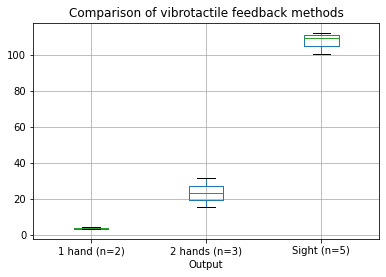

In [5]:
# Plot the ITR difference between one hand, two hands, and sight.

# Get all s trials
s_trials = experiments[experiments['trial name'].str.contains('s')]

# Also get some full-system trials for the sight comparison.
f_trials = experiments[(experiments['subject'] == 'Ahmed') & (experiments['trial name'].str.contains('f'))]
f_trials = f_trials[f_trials['trial id'] < 20]
output_trials = s_trials.append(f_trials)

output_trials['new_itr'] = output_trials.apply(lambda x: calc_itr(conv2arr(x['encoding corrected']), conv2arr(x['decoding corrected']), x['time (s)']), axis=1)

# Create a Pandas Boxplot for comparison.
boxplot = output_trials.boxplot(by='Output', column='new_itr', backend='matplotlib')
plt.title('Comparison of vibrotactile feedback methods')
plt.xticks([1, 2, 3], ['1 hand (n=2)', '2 hands (n=3)', 'Sight (n=5)'])
plt.suptitle('')

# TODO: Also add accuracy.

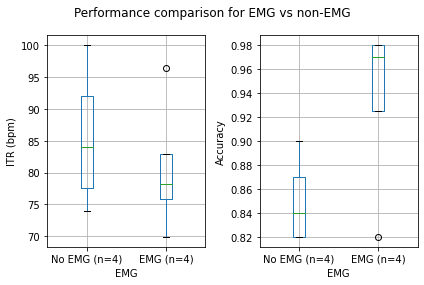

In [6]:
# Plot the difference in ITR and accuracy between EMG and no EMG.
# For EMG we have trials: e1, e2, f5, f.53.
# For no-EMG we have trials: f1, f2, f3, t2.

emg_trials = experiments[(experiments['trial name'] == 'e1') | (experiments['trial name'] == 'e2') | (experiments['trial name'] == 'f5') | (experiments['trial name'] == 'f.53') | (experiments['trial name'] == 'f1') | (experiments['trial name'] == 'f2') | (experiments['trial name'] == 'f3') | (experiments['trial name'] == 't2')]

# Filter out any duplicates by filtering out the Nathan trials.
emg_trials = emg_trials[emg_trials['subject'] != 'Nathan']

# Calculate the ITR and accuracy for all trials.
emg_trials['new_itr'] = emg_trials.apply(lambda x: calc_itr(conv2arr(x['reference']), conv2arr(x['encoding corrected']), x['time (s)']), axis=1)
emg_trials['new_accuracy'] = emg_trials.apply(lambda x: calc_accuracy(conv2arr(x['reference']), conv2arr(x['encoding corrected'])), axis=1)

# Make boxplots for comparison.
fig, (ax1, ax2) = plt.subplots(1, 2)

boxplot = emg_trials.boxplot(by='EMG', column='new_itr', backend='matplotlib', ax=ax1)
ax1.set_title('')
ax1.set_ylabel('ITR (bpm)')
ax1.set_xticklabels(['No EMG (n=4)', 'EMG (n=4)'])

boxplot = emg_trials.boxplot(by='EMG', column='new_accuracy', backend='matplotlib', ax=ax2)
ax2.set_title('')
ax2.set_ylabel('Accuracy')
ax2.set_xticklabels(['No EMG (n=4)', 'EMG (n=4)'])

fig.suptitle('Performance comparison for EMG vs non-EMG')
fig.tight_layout()

C:\Users\Scidex Immanenz\01Programming\imu-vibration-itr-maximization\performance_calculation.py:36: RuntimeWarning: divide by zero encountered in log2
  itr = np.log2(num_targets) + (acc * np.log2(acc)) + ((1 - acc) * np.log2((1 - acc) / (num_targets - 1)))
C:\Users\Scidex Immanenz\01Programming\imu-vibration-itr-maximization\performance_calculation.py:36: RuntimeWarning: invalid value encountered in double_scalars
  itr = np.log2(num_targets) + (acc * np.log2(acc)) + ((1 - acc) * np.log2((1 - acc) / (num_targets - 1)))
<ipython-input-7-be95dbd47dc3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e_trials['new_itr'] = e_trials.apply(lambda x: calc_itr(conv2arr(x['reference']), conv2arr(x['encoding corrected']), x['time (s)']), axis=1)
<ipytho

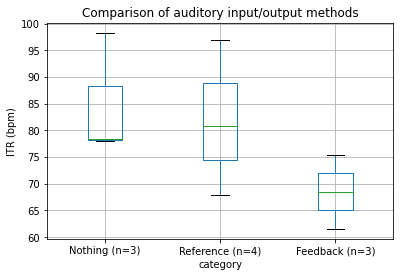

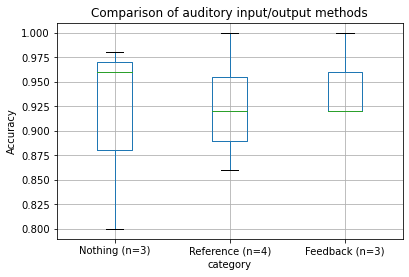

In [7]:
# Plot the difference in ITR (and accuracy?) for no speaking vs. speaking reference vs. speaking feedback

def category_switch(ref, feed):
    if ref == 1:
        category = 1
    elif feed == 1:
        category = 2
    else:
        category = 0
    return category

# Get all the e trials.
e_trials = experiments[experiments['trial name'].str.contains('e')]

e_trials['new_itr'] = e_trials.apply(lambda x: calc_itr(conv2arr(x['reference']), conv2arr(x['encoding corrected']), x['time (s)']), axis=1)
e_trials['category'] = e_trials.apply(lambda x: category_switch(x['Speaker reference list'], x['Speaker feedback']), axis=1)
e_trials['accuracy'] = e_trials.apply(lambda x: calc_accuracy(conv2arr(x['reference']), conv2arr(x['encoding corrected'])), axis=1)

# Create a Pandas Boxplot for comparison.
boxplot = e_trials.boxplot(by='category', column='new_itr', backend='matplotlib')
plt.title('Comparison of auditory input/output methods')
plt.xticks([1, 2, 3], ['Nothing (n=3)', 'Reference (n=4)', 'Feedback (n=3)'])
plt.ylabel('ITR (bpm)')
plt.suptitle('')
plt.show()
                                      
# Create a Pandas Boxplot for comparison.
boxplot = e_trials.boxplot(by='category', column='accuracy', backend='matplotlib')
plt.title('Comparison of auditory input/output methods')
plt.xticks([1, 2, 3], ['Nothing (n=3)', 'Reference (n=4)', 'Feedback (n=3)'])
plt.ylabel('Accuracy')
plt.suptitle('')
plt.show()

In [8]:
# Plot the relation between the time of an experiment and the full system ITR/accuracy.

def itr_wrapper(input1, input2, output, time):
    if input2 is not None:
        print('input 1: {}, input 2: {}, input 3: {}'.format(input1.shape[1], input2.shape[1], output.shape[1]))
    if input1.shape[1] != output.shape[1] and input2.shape[1] == output.shape[1]:
        return calc_itr(input2, output, time)
    else:
        return calc_itr(input1, output, time)

# Exclude e_trials
no_e_trials = experiments[~experiments['trial name'].str.contains('e')]

# Exclude trials without decoding.
time_relation_trials = no_e_trials[~no_e_trials['decoding corrected'].isnull()]
time_relation_trials_itr = time_relation_trials.apply(lambda x: itr_wrapper(conv2arr(x['reference']), conv2arr(x['reference_shortened']), conv2arr(x['decoding corrected']), x['time (s)']), axis=1)


# No results that are very usable (yet)
plt.figure()
plt.scatter(time_relation_trials['time (s)'], time_relation_trials_itr)
plt.ylabel('ITR (BPM)')
plt.xlabel('Time (s)')
plt.show()

# Try for the number of characters.
plt.figure()
plt.scatter(time_relation_trials['Num characters'], time_relation_trials_itr)
plt.ylabel('ITR (BPM)')
plt.xlabel('Number of characters')
plt.show()

input 1: 50, input 2: 50, input 3: 50
input 1: 50, input 2: 50, input 3: 50
input 1: 50, input 2: 50, input 3: 50
input 1: 200, input 2: 103, input 3: 103
input 1: 200, input 2: 120, input 3: 120
input 1: 200, input 2: 137, input 3: 134


ValueError: operands could not be broadcast together with shapes (1,200) (1,134) 

### Encoding vs decoding vs full system ITR

In [ ]:
# Plot the difference in ITR and accuracy for encoding, decoding and full system ITR (without EMG, with EMG)
# For encoding we have trials: f1, f2, f3 
# For decoding we have trials: f1, f2, f3
# For full system we have trials:

all_trials = experiments[(experiments['trial name'] == 'f1') | (experiments['trial name'] == 'f2') | (experiments['trial name'] == 'f3')]

# Filter out any duplicates by filtering out the Nathan trials.
all_trials = all_trials[all_trials['subject'] != 'Nathan']

# Calculate the ITR and accuracy for all encoding trials.
all_trials['new_itr_encoding'] = all_trials.apply(lambda x: calc_itr(conv2arr(x['reference']), conv2arr(x['encoding corrected']), x['time (s)']), axis=1)
all_trials['new_accuracy_encoding'] = all_trials.apply(lambda x: calc_accuracy(conv2arr(x['reference']), conv2arr(x['encoding corrected'])), axis=1)

# Calculate the ITR and accuracy for all decoding trials.
all_trials['new_itr_decoding'] = all_trials.apply(lambda x: calc_itr(conv2arr(x['encoding corrected']), conv2arr(x['decoding corrected']), x['time (s)']), axis=1)
all_trials['new_accuracy_decoding'] = all_trials.apply(lambda x: calc_accuracy(conv2arr(x['encoding corrected']), conv2arr(x['decoding corrected'])), axis=1)

# Calculate the ITR and accuracy for all encoding trials.
all_trials['new_itr_full_system'] = all_trials.apply(lambda x: calc_itr(conv2arr(x['reference']), conv2arr(x['decoding corrected']), x['time (s)']), axis=1)
all_trials['new_accuracy_full_system'] = all_trials.apply(lambda x: calc_accuracy(conv2arr(x['reference']), conv2arr(x['decoding corrected'])), axis=1)

# Make boxplots for comparison.
fig, (ax1, ax2) = plt.subplots(1, 2)

data_itr = [all_trials['new_itr_encoding'], all_trials['new_itr_decoding'], all_trials['new_itr_full_system']]
data_accuracy = [all_trials['new_accuracy_encoding'], all_trials['new_accuracy_decoding'], all_trials['new_accuracy_full_system']]

boxplot = ax1.boxplot(data_itr)
ax1.set_title('')
ax1.set_ylabel('ITR (bpm)')
ax1.set_xticklabels(['Encoding\n(n=3)', 'Decoding\n(n=3)', 'Both\n(n=3)'])
ax1.set_yticks([70, 75, 80, 85, 90, 95, 100, 105, 110])
ax1.yaxis.grid()
ax1.xaxis.grid()


boxplot = ax2.boxplot(data_accuracy)
ax2.set_title('')
ax2.set_ylabel('Accuracy')
ax2.set_xticklabels(['Encoding\n(n=3)', 'Decoding\n(n=3)', 'Both\n(n=3)'])
ax2.yaxis.grid()
ax2.xaxis.grid()

fig.suptitle('Performance comparison for encoding, decoding and full system | No EMG')
fig.tight_layout()
plt.savefig('encoding_decoding_full.png')